In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics,cross_validation,preprocessing
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.tree import DecisionTreeClassifier
import re

In [66]:
%matplotlib inline

In [67]:
df=pd.read_csv('C://Users//Sudipta//Desktop//ML//acadgild//pycodes//loan credit//cs-training.csv',',')

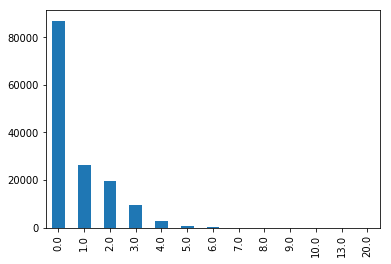

In [13]:
pd.value_counts(df.NumberOfDependents).plot(kind='bar')

In [14]:
pd.crosstab(df.NumberOfDependents, df.SeriousDlqin2yrs)

SeriousDlqin2yrs,0,1
NumberOfDependents,,
0.0,81807,5095
1.0,24381,1935
2.0,17938,1584
3.0,8646,837
4.0,2565,297
5.0,678,68
6.0,134,24
7.0,46,5
8.0,22,2


In [15]:
pd.crosstab(df.age, df.NumberOfDependents)

NumberOfDependents,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,13.0,20.0
age,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0,0,0
21,148,3,1,0,0,0,0,0,0,0,0,0,0
22,385,7,2,2,0,0,0,0,0,0,0,0,0
23,550,33,13,3,0,0,0,0,0,0,0,0,0
24,689,48,19,3,1,0,0,0,0,0,0,0,0
25,774,91,31,7,5,1,0,0,0,0,0,0,0
26,946,128,56,14,4,0,0,0,0,0,0,0,0
27,1001,192,53,32,4,0,0,0,0,0,0,0,0
28,1142,210,114,45,8,1,0,0,0,0,0,0,0


In [68]:
def camel_to_snake(column_name):
    """
    converts a string that is camelCase into snake_case
    Example:
        print camel_to_snake("javaLovesCamelCase")
        > java_loves_camel_case
    See Also:
        http://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-camel-case
    """
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [69]:
df.columns = [camel_to_snake(col) for col in df.columns]
df.columns.tolist()

['unnamed: 0',
 'serious_dlqin2yrs',
 'revolving_utilization_of_unsecured_lines',
 'age',
 'number_of_time30-59_days_past_due_not_worse',
 'debt_ratio',
 'monthly_income',
 'number_of_open_credit_lines_and_loans',
 'number_of_times90_days_late',
 'number_real_estate_loans_or_lines',
 'number_of_time60-89_days_past_due_not_worse',
 'number_of_dependents']

In [23]:
mask = (df.monthly_income > 5000) & (df.serious_dlqin2yrs==1)
len(df[mask])

3544

In [26]:
melted = pd.melt(df,id_vars=['serious_dlqin2yrs'],value_vars=['age'])

In [37]:
type(melted)

pandas.core.frame.DataFrame

In [49]:
mask = (melted['serious_dlqin2yrs'] == 1) & (df['age'] < 30)

In [50]:
len(melted[mask])

1035

In [51]:
melted

,serious_dlqin2yrs,variable,value
0,1,age,45
1,0,age,40
2,0,age,38
3,0,age,30
4,0,age,49
5,0,age,74
6,0,age,57
7,0,age,39
8,0,age,27
9,0,age,57


## Chi-square test

In [62]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['number_of_dependents'],df['serious_dlqin2yrs']))

(354.47940373068514,
 1.5913097676724319e-68,
 12,
 array([[  8.47551902e+04,   6.07080984e+03],
        [  2.45570386e+04,   1.75896144e+03],
        [  1.82171495e+04,   1.30485048e+03],
        [  8.84915628e+03,   6.33843720e+02],
        [  2.67070392e+03,   1.91296080e+02],
        [  6.96137360e+02,   4.98626400e+01],
        [  1.47439280e+02,   1.05607200e+01],
        [  4.75911600e+01,   3.40884000e+00],
        [  2.23958400e+01,   1.60416000e+00],
        [  4.66580000e+00,   3.34200000e-01],
        [  4.66580000e+00,   3.34200000e-01],
        [  9.33160000e-01,   6.68400000e-02],
        [  9.33160000e-01,   6.68400000e-02]]))

In [63]:
import scipy.stats as scs

def categories(series):
    return range(int(series.min()), int(series.max()) + 1)


def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
               for cat1 in categories(df_col1)]

    return scs.chi2_contingency(result)



In [64]:
print(chi_square_of_df_cols(df, 'number_of_dependents', 'serious_dlqin2yrs'))

ValueError: The internally computed table of expected frequencies has a zero element at (11, 0).

## Imputation

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
income_imputer = KNeighborsRegressor(n_neighbors=1)

In [71]:
df_w_monthly_income = df[df['monthly_income'].isnull()== False]
df_w_null_monthly_income = df[df['monthly_income'].isnull() ==True]

In [73]:
df_w_monthly_income.corr()

,unnamed: 0,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
unnamed: 0,1.000000,0.004781,0.001787,0.005094,-0.001897,-0.002949,0.002632,0.003201,-0.002417,-0.000701,-0.002050,0.000170
serious_dlqin2yrs,0.004781,1.000000,-0.002386,-0.102685,0.123159,-0.003291,-0.019746,-0.027445,0.111149,-0.003005,0.093836,0.046704
revolving_utilization_of_unsecured_lines,0.001787,-0.002386,1.000000,-0.005476,-0.001194,-0.000243,0.007124,-0.010880,-0.000931,0.005895,-0.000955,0.002347
age,0.005094,-0.102685,-0.005476,1.000000,-0.049177,-0.001260,0.037717,0.187112,-0.047889,0.065110,-0.043501,-0.206397
number_of_time30-59_days_past_due_not_worse,-0.001897,0.123159,-0.001194,-0.049177,1.000000,-0.001981,-0.010217,-0.043868,0.975259,-0.024036,0.980131,0.003538
debt_ratio,-0.002949,-0.003291,-0.000243,-0.001260,-0.001981,1.000000,-0.028712,0.008685,-0.002703,0.019574,-0.001801,0.009803
monthly_income,0.002632,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
number_of_open_credit_lines_and_loans,0.003201,-0.027445,-0.010880,0.187112,-0.043868,0.008685,0.091455,1.000000,-0.072249,0.426536,-0.061505,0.038342
number_of_times90_days_late,-0.002417,0.111149,-0.000931,-0.047889,0.975259,-0.002703,-0.012743,-0.072249,1.000000,-0.040573,0.989277,-0.003779
number_real_estate_loans_or_lines,-0.000701,-0.003005,0.005895,0.065110,-0.024036,0.019574,0.124959,0.426536,-0.040573,1.000000,-0.034118,0.118997


In [74]:
df_w_monthly_income.corr().ix[:,5]

C:\Users\Sudipta\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


unnamed: 0                                    -0.002949
serious_dlqin2yrs                             -0.003291
revolving_utilization_of_unsecured_lines      -0.000243
age                                           -0.001260
number_of_time30-59_days_past_due_not_worse   -0.001981
debt_ratio                                     1.000000
monthly_income                                -0.028712
number_of_open_credit_lines_and_loans          0.008685
number_of_times90_days_late                   -0.002703
number_real_estate_loans_or_lines              0.019574
number_of_time60-89_days_past_due_not_worse   -0.001801
number_of_dependents                           0.009803
Name: debt_ratio, dtype: float64

In [75]:
cols = ['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']
income_imputer.fit(df_w_monthly_income[cols], df_w_monthly_income.monthly_income)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [76]:
new_values = income_imputer.predict(df_w_null_monthly_income[cols])

In [77]:
df_w_null_monthly_income['monthly_income'] = new_values

C:\Users\Sudipta\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [106]:
df1 = df_w_null_monthly_income.append(df_w_monthly_income)

In [108]:
df['monthly_income'] = np.where(df['monthly_income'].isnull(), df1['monthly_income'],df['monthly_income'])

In [112]:
print_null_freq(df)

value,False,True
variable,,
age,150000,0
debt_ratio,150000,0
monthly_income,150000,0
number_of_dependents,146076,3924
number_of_open_credit_lines_and_loans,150000,0
number_of_time30-59_days_past_due_not_worse,150000,0
number_of_time60-89_days_past_due_not_worse,150000,0
number_of_times90_days_late,150000,0
number_real_estate_loans_or_lines,150000,0


In [111]:
def print_null_freq(df):
    df_lng = pd.melt(df)
    null_variables = df_lng.value.isnull()
    return pd.crosstab(df_lng.variable,null_variables)

## Handling for number of dependents

In [113]:
df_w_dependent = df[df['number_of_dependents'].isnull()== False]
df_w_null_dependent = df[df['number_of_dependents'].isnull() ==True]

In [114]:
df_w_dependent.corr()

,unnamed: 0,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
unnamed: 0,1.000000,0.002863,0.002250,0.005721,-0.000494,-0.003716,0.002588,0.004155,-0.001130,-0.001212,-0.000785,-0.000055
serious_dlqin2yrs,0.002863,1.000000,-0.001601,-0.113907,0.127084,-0.007747,-0.017511,-0.031478,0.118148,-0.008379,0.102397,0.046048
revolving_utilization_of_unsecured_lines,0.002250,-0.001601,1.000000,-0.005808,-0.001235,0.004059,0.005973,-0.011021,-0.000995,0.006633,-0.000987,0.001557
age,0.005721,-0.113907,-0.005808,1.000000,-0.057981,0.025773,0.033193,0.157961,-0.056152,0.041663,-0.052066,-0.213303
number_of_time30-59_days_past_due_not_worse,-0.000494,0.127084,-0.001235,-0.057981,1.000000,-0.006064,-0.007481,-0.052329,0.981770,-0.029059,0.985573,-0.002680
debt_ratio,-0.003716,-0.007747,0.004059,0.025773,-0.006064,1.000000,-0.006625,0.051044,-0.007972,0.116461,-0.007118,-0.040673
monthly_income,0.002588,-0.017511,0.005973,0.033193,-0.007481,-0.006625,1.000000,0.079701,-0.009432,0.110038,-0.008200,0.056673
number_of_open_credit_lines_and_loans,0.004155,-0.031478,-0.011021,0.157961,-0.052329,0.051044,0.079701,1.000000,-0.078079,0.430833,-0.068600,0.065322
number_of_times90_days_late,-0.001130,0.118148,-0.000995,-0.056152,0.981770,-0.007972,-0.009432,-0.078079,1.000000,-0.044271,0.991976,-0.010176
number_real_estate_loans_or_lines,-0.001212,-0.008379,0.006633,0.041663,-0.029059,0.116461,0.110038,0.430833,-0.044271,1.000000,-0.038429,0.124684


In [120]:
df_w_monthly_income.corr().ix[:,11]

C:\Users\Sudipta\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


unnamed: 0                                     0.000170
serious_dlqin2yrs                              0.046704
revolving_utilization_of_unsecured_lines       0.002347
age                                           -0.206397
number_of_time30-59_days_past_due_not_worse    0.003538
debt_ratio                                     0.009803
monthly_income                                 0.062647
number_of_open_credit_lines_and_loans          0.038342
number_of_times90_days_late                   -0.003779
number_real_estate_loans_or_lines              0.118997
number_of_time60-89_days_past_due_not_worse   -0.005092
number_of_dependents                           1.000000
Name: number_of_dependents, dtype: float64

In [121]:
cols = ['number_real_estate_loans_or_lines','number_of_open_credit_lines_and_loans','monthly_income','serious_dlqin2yrs']

In [122]:
income_imputer2 = KNeighborsRegressor(n_neighbors=1)

In [123]:
income_imputer2.fit(df_w_dependent[cols], df_w_dependent.number_of_dependents)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [124]:
new_values = income_imputer2.predict(df_w_null_dependent[cols])

In [125]:
df_w_null_dependent['number_of_dependents'] = new_values

C:\Users\Sudipta\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [126]:
df1 = df_w_null_dependent.append(df_w_dependent)

In [128]:
df['number_of_dependents'] = np.where(df['number_of_dependents'].isnull(), df1['number_of_dependents'],df['number_of_dependents'])


In [129]:
print_null_freq(df)

value,False
variable,
age,150000
debt_ratio,150000
monthly_income,150000
number_of_dependents,150000
number_of_open_credit_lines_and_loans,150000
number_of_time30-59_days_past_due_not_worse,150000
number_of_time60-89_days_past_due_not_worse,150000
number_of_times90_days_late,150000
number_real_estate_loans_or_lines,150000


## Finding Important features

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
features = np.array(['revolving_utilization_of_unsecured_lines',
                     'age', 'number_of_time30-59_days_past_due_not_worse',
                     'debt_ratio', 'monthly_income','number_of_open_credit_lines_and_loans', 
                     'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
                     'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents'])

In [133]:
clf = RandomForestClassifier()

In [134]:
clf.fit(df[features], df['serious_dlqin2yrs'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [135]:
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

In [136]:
sorted_idx

array([7, 8, 9, 2, 5, 6, 1, 4, 3, 0], dtype=int64)

In [137]:
importances

array([ 0.19115198,  0.12296222,  0.05509852,  0.17478965,  0.16622742,
        0.08520307,  0.09534149,  0.03240485,  0.0359235 ,  0.04089731])

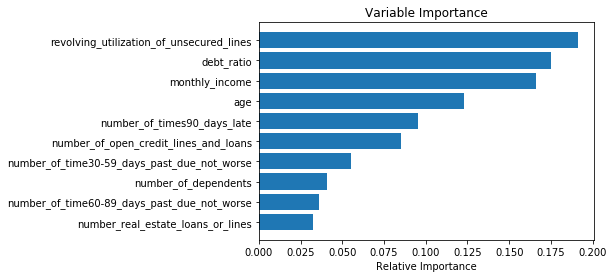

In [139]:
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

## Bucketing continuous variables

In [144]:
df['monthly_income'].value_counts().sort_index()

0.0          1987
1.0           735
2.0             7
4.0             3
5.0             3
7.0             1
9.0             1
10.0            2
11.0            1
15.0            1
21.0            1
25.0            1
27.0            2
34.0            1
40.0            3
42.0            1
50.0            5
55.0            1
56.0            1
69.0            2
70.0            2
72.0            1
75.0            2
83.0            2
84.0            1
100.0          28
101.0           1
105.0           1
107.0           2
115.0           2
             ... 
173000.0        2
184903.0        1
203500.0        1
208333.0        1
218674.0        1
234600.0        1
235000.0        1
237400.0        1
237490.0        1
250000.0        2
251608.0        2
261666.0        1
287662.0        2
304000.0        1
324000.0        1
408333.0        2
428250.0        1
440000.0        1
562466.0        1
582369.0        1
629000.0        1
649587.0        1
699530.0        2
702500.0        1
730483.0  

In [147]:
df['income_bins'] = pd.cut(df.monthly_income, bins=15,labels = False)
pd.value_counts(df['income_bins'])

0     149966
1         16
3          7
2          6
14         1
8          1
7          1
5          1
4          1
Name: income_bins, dtype: int64

In [149]:
## inspecting the predictive value of your bins

In [150]:
df[["income_bins", "serious_dlqin2yrs"]].groupby("income_bins").mean()

,serious_dlqin2yrs
income_bins,
0,0.066842
1,0.125000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
7,0.000000
8,0.000000
14,0.000000


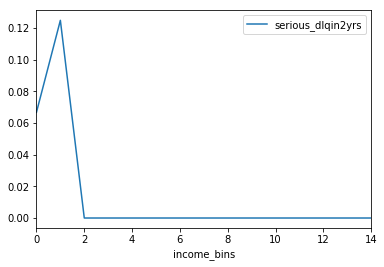

In [151]:
cols = ["income_bins", "serious_dlqin2yrs"]
df[cols].groupby("income_bins").mean().plot()

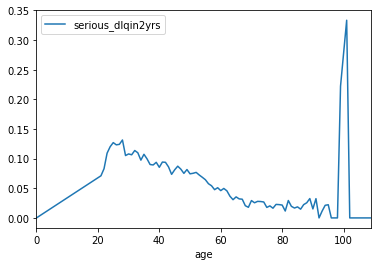

In [152]:
cols = ['age', 'serious_dlqin2yrs']
age_means = df[cols].groupby("age").mean()
age_means.plot()

In [156]:
mybins = [0,20,25,30,35,40,45,50,55,60,65,70,80,120]
df['age_bucket'] = pd.cut(df.age, bins=mybins)
df['age_bucket'].value_counts()

(45, 50]     18829
(50, 55]     17861
(55, 60]     16945
(60, 65]     16461
(40, 45]     16208
(35, 40]     13611
(70, 80]     12700
(65, 70]     10963
(30, 35]     10728
(25, 30]      7730
(80, 120]     4936
(20, 25]      3027
(0, 20]          0
Name: age_bucket, dtype: int64

In [157]:
df[["age_bucket", "serious_dlqin2yrs"]].groupby("age_bucket").mean().fillna(0)

,serious_dlqin2yrs
age_bucket,
"(0, 20]",0.000000
"(20, 25]",0.111662
"(25, 30]",0.117206
"(30, 35]",0.106916
"(35, 40]",0.091323
"(40, 45]",0.085452
"(45, 50]",0.080089
"(50, 55]",0.071553
"(55, 60]",0.051402


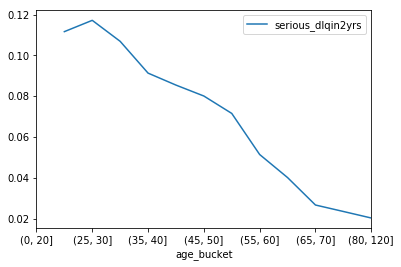

In [158]:
df[["age_bucket", "serious_dlqin2yrs"]].groupby("age_bucket").mean().plot()

In [164]:
df.debt_ratio.head()

0    0.802982
1    0.121876
2    0.085113
3    0.036050
4    0.024926
Name: debt_ratio, dtype: float64

In [165]:
bins = []

for q in [0.2, 0.4, 0.6, 0.8, 1.0]:
    bins.append(df.debt_ratio.quantile(q))

In [166]:
bins

[0.1337728666, 0.28746027440000016, 0.467506417, 4.0, 329664.0]

In [168]:
debt_ratio_binned = pd.cut(df.debt_ratio, bins=bins)
debt_ratio_binned
print (pd.value_counts(debt_ratio_binned))

(0.468, 4.0]       30109
(0.287, 0.468]     30000
(0.134, 0.287]     30000
(4.0, 329664.0]    29891
Name: debt_ratio, dtype: int64


## Scaling

In [170]:
from sklearn.preprocessing import StandardScaler

df['monthly_income_scaled'] = StandardScaler().fit_transform(df.monthly_income)

C:\Users\Sudipta\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Sudipta\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [173]:
best_features = features[sorted_idx][::-1]
pd.DataFrame({ "name": best_features })

,name
0,revolving_utilization_of_unsecured_lines
1,debt_ratio
2,monthly_income
3,age
4,number_of_times90_days_late
5,number_of_open_credit_lines_and_loans
6,number_of_time30-59_days_past_due_not_worse
7,number_of_dependents
8,number_of_time60-89_days_past_due_not_worse
9,number_real_estate_loans_or_lines


## Model

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [177]:
df.columns

Index(['unnamed: 0', 'serious_dlqin2yrs',
       'revolving_utilization_of_unsecured_lines', 'age',
       'number_of_time30-59_days_past_due_not_worse', 'debt_ratio',
       'monthly_income', 'number_of_open_credit_lines_and_loans',
       'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
       'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents',
       'income_bins', 'age_bucket', 'monthly_income_scaled'],
      dtype='object')

In [181]:
X_train, X_test, Y_train, Y_test = splitTrainTest(df,'serious_dlqin2yrs')

(120000, 14)
(30000, 14)
(120000,)
(30000,)


In [182]:
features = ['revolving_utilization_of_unsecured_lines', 'debt_ratio',
            'monthly_income', 'age', 'number_of_times90_days_late']

clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train[features], Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [183]:
clf.predict(X_test[features])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [185]:
clf.predict_proba(X_test[features])

array([[ 0.92307692,  0.07692308],
       [ 1.        ,  0.        ],
       [ 0.92307692,  0.07692308],
       ..., 
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.92307692,  0.07692308]])

(array([  2.47830000e+04,   3.68600000e+03,   1.10000000e+03,
          2.92000000e+02,   8.70000000e+01,   2.50000000e+01,
          1.30000000e+01,   8.00000000e+00,   3.00000000e+00,
          3.00000000e+00]),
 array([ 0.        ,  0.08461538,  0.16923077,  0.25384615,  0.33846154,
         0.42307692,  0.50769231,  0.59230769,  0.67692308,  0.76153846,
         0.84615385]),
 <a list of 10 Patch objects>)

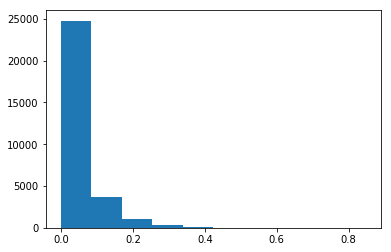

In [195]:
probs = clf.predict_proba(X_test[features])
prob_true = probs[::,1]
plt.hist(prob_true)

## Model evaluation

In [196]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [197]:
preds = clf.predict_proba(X_test[features])
preds

array([[ 0.92307692,  0.07692308],
       [ 1.        ,  0.        ],
       [ 0.92307692,  0.07692308],
       ..., 
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.92307692,  0.07692308]])

In [198]:
confusion_matrix(Y_test, clf.predict(X_test[features]))

array([[27945,    11],
       [ 2028,    16]])

In [199]:
pd.crosstab(Y_test, clf.predict(X_test[features]), rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,27945,11
1,2028,16


In [201]:
print( classification_report(Y_test, clf.predict(X_test[features]), labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     27956
          1       0.59      0.01      0.02      2044

avg / total       0.91      0.93      0.90     30000



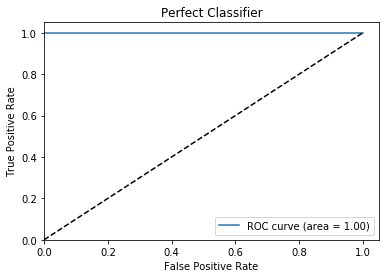

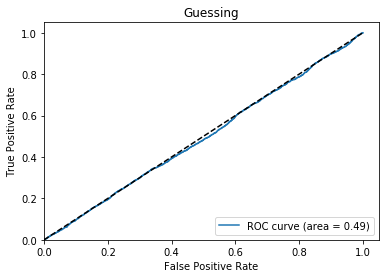

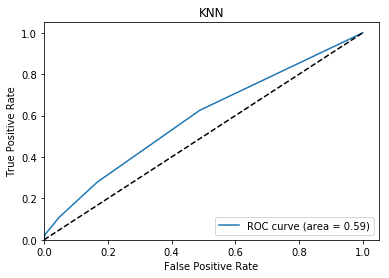

In [202]:
def plot_roc(name, probs):
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc="lower right")
    plt.show()
plot_roc("Perfect Classifier", Y_test)
plot_roc("Guessing", np.random.uniform(0, 1, len(Y_test)))

#[::,1] selects the 2nd column of the numpy array
plot_roc("KNN", preds[::,1])

In [203]:
def convert_prob_to_score(p):
    """
    takes a probability and converts it to a score
    Example:
        convert_prob_to_score(0.1)
        466
    """
    odds = (1 - p) / p
    scores = np.log(odds)*(40/np.log(2)) + 340
    return scores.astype(np.int)

convert_prob_to_score(probs)

C:\Users\Sudipta\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Sudipta\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log


array([[        196,         483],
       [-2147483648, -2147483648],
       [        196,         483],
       ..., 
       [-2147483648, -2147483648],
       [-2147483648, -2147483648],
       [        196,         483]])

In [179]:
def splitTrainTest(df,targetVariable):
    x = df.drop(targetVariable, axis = 1)
    y = df[targetVariable]
    X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.2, random_state = 5)
    print(X_train.shape)
    print(X_test.shape)
    print(Y_train.shape)
    print(Y_test.shape)
    return X_train, X_test, Y_train, Y_test